In [1]:
import os
import numpy as np
import pandas
import matplotlib.pyplot as plt

from osgeo import gdal

filepath="C:\\GEOG 360 PROJECT\\"
data1=gdal.Open(filepath+'newcategorydata.tif')

nb=data1.RasterCount
ns=int(data1.RasterXSize)
nl=int(data1.RasterYSize)

dataar=data1.ReadAsArray().astype('byte')
cdata=dataar

In [2]:
####### CREATE MAP OF INCIDENTS
newarr = np.diff(cdata, axis=0)
incidents=np.count_nonzero(newarr,axis=0)

#writedata(FileName,incidents)
#plt.imshow(incidents,cmap='plasma')

countpixel=[]
#count pixels with number of changes
for y in range(nb):
    for i in np.unique(incidents):
        #countpixel.append(np.sum(binarydata[y]==i))
        countpixel.append(np.sum(cdata[y]==i))
        
changemap=newarr!= 0
changemap=changemap.astype(int)        
        

def convert(list): 
      
    # Converting integer list to string list 
    s = [str(i) for i in list] 
      
    # Join list items using join() 
    res = str("".join(s)) 
      
    return(res) 

unique_=np.zeros((nl,ns)).astype(str)
# Driver code for
for i in range(nl):
    for j in range(ns):
        #a = binarydata[:,i,j].tolist()
        a = changemap[:,i,j].tolist()
        unique_[i,j]=convert(a)
            

np.size(np.unique(unique_))
np.unique(unique_).astype(str)

startyear='1986'
endyear='2004'
gap=2



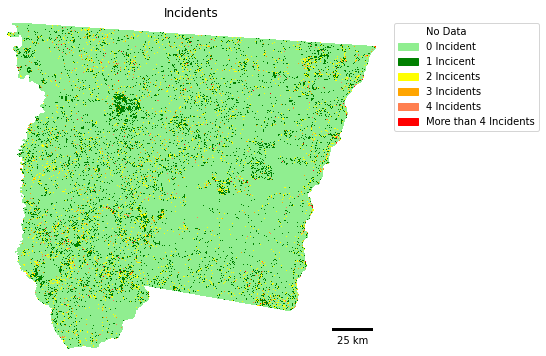

In [4]:
################ PLOT INCIDENTS MAP #############

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

categorylist=['No Data','0 Incident','1 Incicent','2 Incicents','3 Incidents','4 Incidents','More than 4 Incidents']
colorlist=['white','lightgreen','green','yellow','orange','coral','red']
cmap = colors.ListedColormap(['white','lightgreen','green','yellow','orange','coral','red'])
boundaries = [-2,-0.9, 0.1, 1.1, 2.1, 3.1, 4.1, 10]
norm = colors.BoundaryNorm(boundaries, ncolors=7, clip=True)

incidents[cdata[0]==0]=-1
#### Dominant Land Cover ######
from matplotlib_scalebar.scalebar import ScaleBar


fig, ax = plt.subplots(figsize=(10,6))

yearlist=np.arange(int(startyear),int(endyear),gap).astype(str)


im = ax.imshow(incidents, interpolation='none',cmap=cmap,norm=norm)
ax.axis('off')
ax.set_title("Incidents")
patches = [mpatches.Patch(color=colorlist[i], label=categorylist[i]) for i in np.arange(len(categorylist))]
# put those patched as legend-handles into the legend
ax.legend(handles=patches,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
#fig.colorbar(im);
scalebar = ScaleBar(30,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)

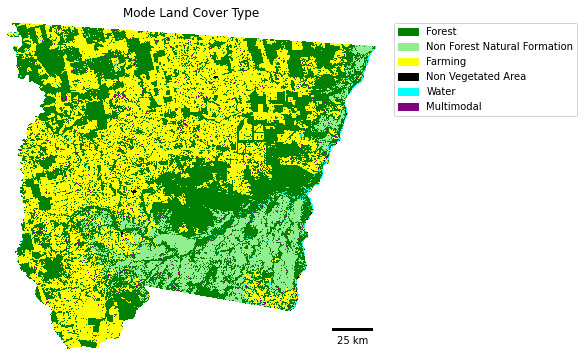

In [3]:
######## MODE LAND COVER #####
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

dom=np.zeros((nl,ns))
for i in np.arange(nl):
    for j in np.arange(ns):
        a=np.unique(cdata[:,i,j],return_counts=True)
        c=a[0][a[1]==np.sort(a[1])[-1]]
        dom[i,j]=int(convert(c))

categorylist=['No Data','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water','Multimodal']


colorlist=['white','green',
'lightgreen','yellow','black','aqua','purple']
cmap = colors.ListedColormap(['white','green',
'lightgreen','yellow','black','aqua','purple'])


boundaries = [0, 1, 2, 3, 4, 5,6,np.max(dom)+1]


#boundaries = [1, 2, 3, 4, 5,6,np.max(dom)]
boundaries = [-1, 0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 346]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)


#### Dominant Land Cover ######
from matplotlib_scalebar.scalebar import ScaleBar


fig, ax = plt.subplots(figsize=(10,6))

yearlist=np.arange(int(startyear),int(endyear),gap).astype(str)


im = ax.imshow(dom, interpolation='none',cmap=cmap,norm=norm)
ax.axis('off')
ax.set_title("Mode Land Cover Type")
patches = [mpatches.Patch(color=colorlist[i], label=categorylist[i]) for i in range(1,7)]
# put those patched as legend-handles into the legend
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
scalebar = ScaleBar(30,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)


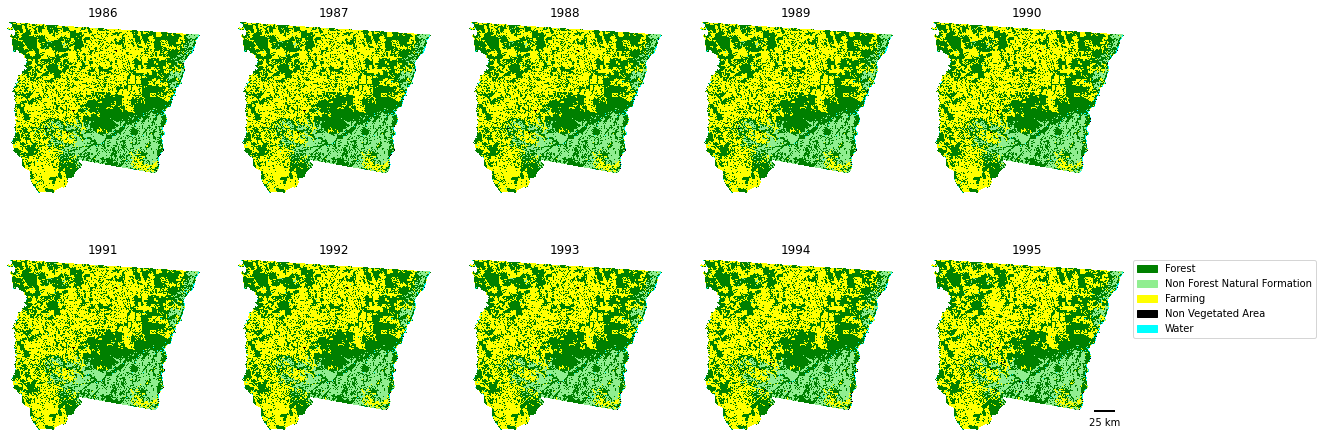

In [5]:
##### Yearly land cover maps #####
categorylist=['No Data','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']

colorlist=['white','green','lightgreen','yellow','black','aqua']
cmap = colors.ListedColormap(['white','green','lightgreen','yellow','black','aqua'])
boundaries = [0, 1, 2, 3, 4, 5,6]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)


i=1
values = np.unique(cdata[i].ravel())

fig, ax = plt.subplots(2,5,figsize=(20,8))

yearlist=np.arange(int(startyear),int(endyear)+gap,1).astype(str)

for ii in range(nb):
#for i in np.unique(cdata[cdata!=0]):
    im = ax.ravel()[ii].imshow(cdata[ii], interpolation='none',cmap=cmap,norm=norm)
    ax.ravel()[ii].axis('off')
    ax.ravel()[ii].set_title(yearlist[ii])
    # get the colors of the values, according to the 
    # colormap used by imshow
    #colors = [ im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    if(ii==nb-1):
        patches = [mpatches.Patch(color=colorlist[i], label=categorylist[i]) for i in np.unique(cdata[cdata!=0])]
        # put those patched as legend-handles into the legend
        ax.ravel()[ii].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
        scalebar = ScaleBar(30,location='lower right') # 1 pixel = 0.2 meter
        ax.ravel()[ii].add_artist(scalebar)       
        

In [5]:
#### CREATE MAP OF STATES AND COMBINATION MAP
map_=np.zeros((nl,ns)).astype('byte')
map_[incidents==0]=0
map_[incidents==1]=1

states=np.zeros((nl,ns))
## count unique elements
for i in range(nl):
    for j in range(ns):
        states[i][j]=len(np.unique(cdata[:,i,j]))
        
states[cdata[0]==0]=0        
map_[np.logical_and(incidents>=2,states==2)]=2
map_[np.logical_and(incidents>=2,states>2)]=3

map_[incidents==-1]=-1
#plot states
#plt.imshow(states)

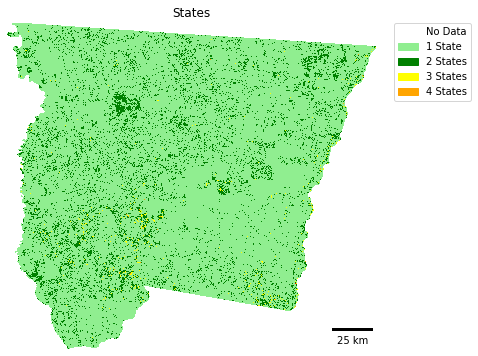

In [7]:
###### STATES
categorylist=['No Data','1 State','2 States','3 States','4 States']
colorlist=['white','lightgreen','green','yellow','orange','red']
cmap = colors.ListedColormap(['white','lightgreen','green','yellow','orange','coral','red'])
boundaries = [-1, 0.1, 1.1, 2.1, 3.1, 4.1, 10]
norm = colors.BoundaryNorm(boundaries, ncolors=7, clip=True)


from matplotlib_scalebar.scalebar import ScaleBar


fig, ax = plt.subplots(figsize=(10,6))

yearlist=np.arange(int(startyear),int(endyear),gap).astype(str)


im = ax.imshow(states, interpolation='none',cmap=cmap,norm=norm)
ax.axis('off')
ax.set_title("States")
patches = [mpatches.Patch(color=colorlist[i], label=categorylist[i]) for i in np.arange(len(categorylist))]
# put those patched as legend-handles into the legend
ax.legend(handles=patches,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
#fig.colorbar(im);
scalebar = ScaleBar(30,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)


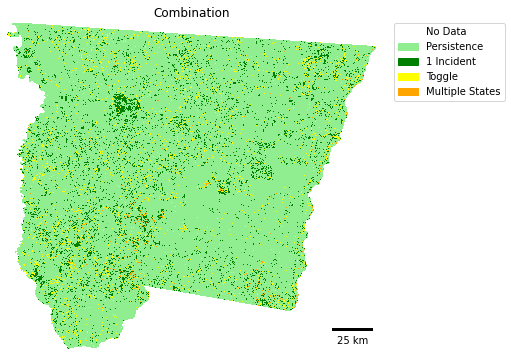

In [9]:
##### COMBINATION
categorylist=['No Data','Persistence','1 Incident','Toggle','Multiple States']
colorlist=['white','lightgreen','green','yellow','orange','red']
cmap = colors.ListedColormap(['white','lightgreen','green','yellow','orange','coral','red'])
boundaries = [-2,-0.9, 0.1, 1.1, 2.1, 3.1, 4.1, 10]
norm = colors.BoundaryNorm(boundaries, ncolors=7, clip=True)


#### Dominant Land Cover ######
from matplotlib_scalebar.scalebar import ScaleBar


fig, ax = plt.subplots(figsize=(10,6))

yearlist=np.arange(int(startyear),int(endyear),gap).astype(str)


im = ax.imshow(map_, interpolation='none',cmap=cmap,norm=norm)
ax.axis('off')
ax.set_title("Combination")
patches = [mpatches.Patch(color=colorlist[i], label=categorylist[i]) for i in np.arange(len(categorylist))]
# put those patched as legend-handles into the legend
ax.legend(handles=patches,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
#fig.colorbar(im);
scalebar = ScaleBar(30,location='lower right') # 1 pixel = 0.2 meter
ax.add_artist(scalebar)

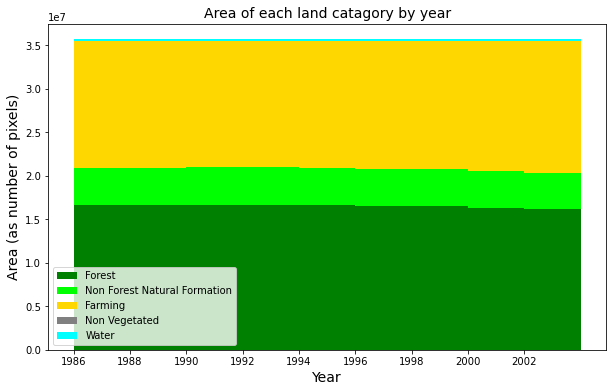

In [8]:
### PLOT CATEGORICAL AREA ####

#for each time interval
#for each categroy
import pandas as pd

dfpres=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
#gainloss.columns=['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']
dfpres['year']=np.arange(int(startyear),int(endyear),gap)



for c in np.unique(cdata[cdata!=0]):
    pres=[]

    for t in range(nb-1):
        pres.append(np.sum(cdata[t]==c))
    
    dfpres.iloc[:,c]=pres
        


### PLOT LOSS AND GAIN ####
fig, ax = plt.subplots(figsize=(10,6))

#labels=np.flip(change[count.argsort()])[0:10]
xlabels=dfpres['year'].astype('str')

width=1.0
bargheight=dfpres.iloc[:,1:].cumsum(axis=1)


p=[]
p.append(ax.bar(xlabels,dfpres.iloc[:,1],width,color='green',align='edge'))


colors=['lime','gold','grey','aqua']
for i in np.unique(cdata[cdata!=0])[1:]:
    p.append(ax.bar(xlabels,dfpres.iloc[:,i],width,bottom=bargheight.iloc[:,i-2],color=colors[i-2],align='edge'))

ax.set_title('Area of each land catagory by year',fontsize=14)
ax.set_ylabel('Area (as number of pixels)',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
plt.legend((p[0][0], p[1][0],p[2][0],p[3][0],p[4][0]), ('Forest','Non Forest Natural Formation','Farming','Non Vegetated','Water',))    

ax.axhline(y=0,color='0',linewidth=0.5)
plt.show()


#fig.savefig('C:\\GEOG 360 PROJECT\\graphs\\area.jpg', bbox_inches='tight',dpi=300,format='jpg')


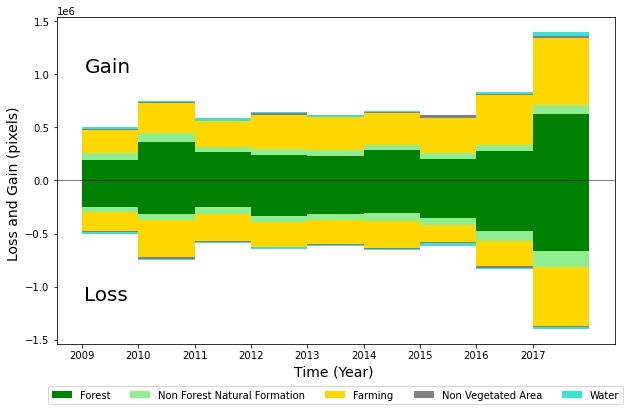

In [9]:
### LOSS AND GAIN ####
startyear=2009
endyear=2018
gap=1
#for each time interval
#for each categroy


import pandas as pd
dfloss=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
#gainloss.columns=['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']
dfloss['year']=np.arange(int(startyear),int(endyear),gap)

dfgain=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
dfgain['year']=np.arange(int(startyear),int(endyear),gap)

for c in np.unique(cdata[cdata!=0]):
    loss=[]
    gain=[]
    for t in range(nb-1):
        #loss for category c
        loss.append(np.sum(np.logical_and(cdata[t]==c,cdata[t+1]!=c)))
        lossind=np.where(np.logical_and(cdata[t]==c,cdata[t+1]!=c))

        gain.append(np.sum(np.logical_and(cdata[t]!=c,cdata[t+1]==c)))
        gainind=np.where(np.logical_and(cdata[t]!=c,cdata[t+1]==c))

    dfloss.iloc[:,c]=loss
    dfgain.iloc[:,c]=gain

    
### PLOT LOSS AND GAIN ####
fig, ax = plt.subplots(figsize=(10,6))

#labels=np.flip(change[count.argsort()])[0:10]
xlabels=dfgain['year'].astype('str')


width=1.0
bargheight=dfgain.iloc[:,1:].cumsum(axis=1)
barlheight=dfloss.iloc[:,1:].cumsum(axis=1)

p=[]
p.append(ax.bar(xlabels,dfgain.iloc[:,1],width,color='green',align='edge'))

x=[]
x.append(ax.bar(xlabels,-dfloss.iloc[:,1],width,color='green',align='edge'))


colors=['lightgreen','gold','grey','turquoise']
#colors=['gold','aqua','grey','crimson']
for i in np.unique(cdata[cdata!=0])[1:]:
    p.append(ax.bar(xlabels,dfgain.iloc[:,i],width,bottom=bargheight.iloc[:,i-2],color=colors[i-2],align='edge'))
    x.append(ax.bar(xlabels,-dfloss.iloc[:,i],width,bottom=-barlheight.iloc[:,i-2],color=colors[i-2],align='edge'))

ax.set_ylabel('Loss and Gain (pixels) ',fontsize=14)
ax.set_xlabel('Time (Year) ',fontsize=14)

ymin, ymax = ax.get_ylim()
xmin,xmax=ax.get_xlim()
ax.text(0.05, 0.85, 'Gain', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,fontsize=20)
ax.text(0.05, 0.15, 'Loss', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,fontsize=20)

plt.legend((p[0][0], p[1][0],p[2][0],p[3][0],p[4][0]), ('Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'),ncol=5, bbox_to_anchor=(0.5, -0.20),loc='lower center')    



ax.axhline(y=0,color='0',linewidth=0.5)
plt.show()

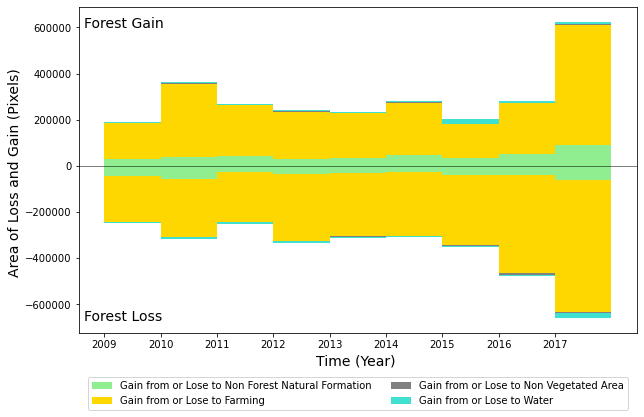

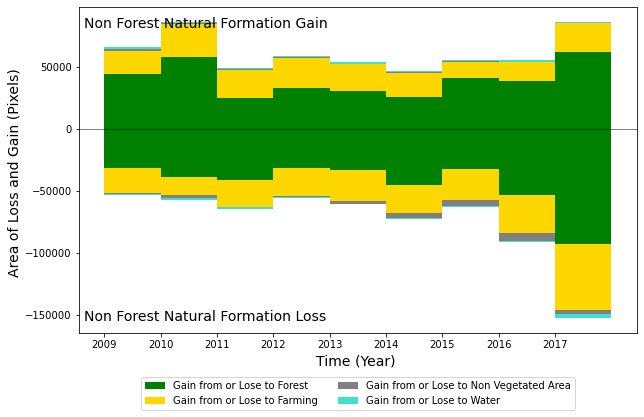

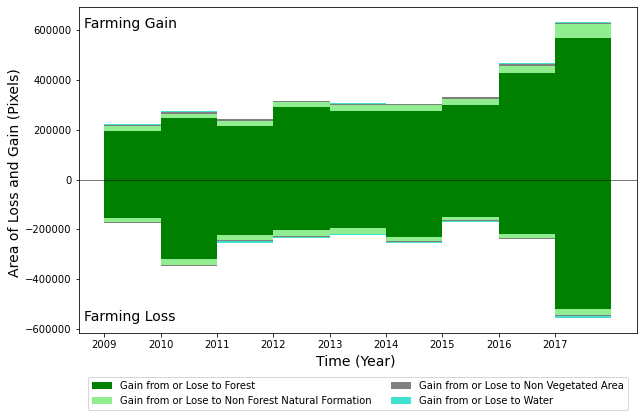

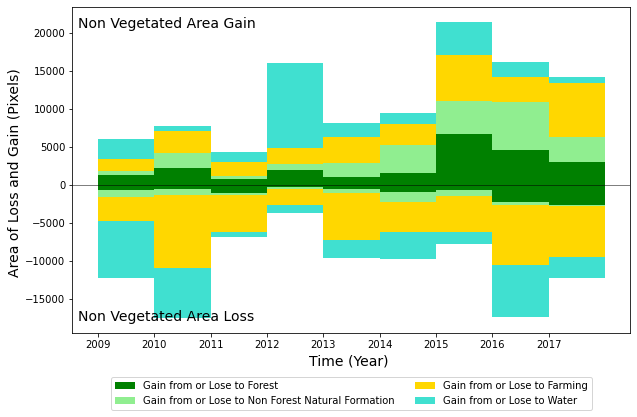

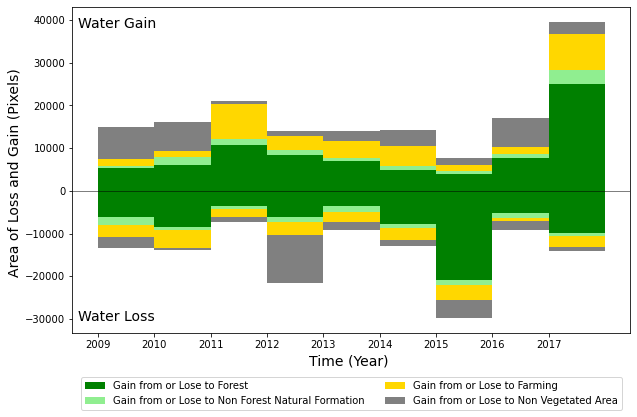

In [11]:
########### TRANSITIONS ############
catlist=['Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']
#for each time interval
#for each categroy
import pandas as pd
dfloss=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
#gainloss.columns=['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']
dfloss['year']=np.arange(int(startyear),int(endyear),gap)

dfgain=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
dfgain['year']=np.arange(int(startyear),int(endyear),gap)


for c in np.unique(cdata[cdata!=0]):
    lossk=np.zeros((nb-1,len(np.unique(cdata))))
    gaink=np.zeros((nb-1,len(np.unique(cdata))))
    loss=[]
    gain=[]
    for t in range(nb-1):
        for k in np.unique(cdata[cdata!=0]):
            if (k!=c):
                #loss to category k
                lossk[t,k-1]=np.sum(np.logical_and(cdata[t]==c,cdata[t+1]==k))
                #gain from category k
                gaink[t,k-1]=np.sum(np.logical_and(cdata[t]==k,cdata[t+1]==c))
            
    fig, ax = plt.subplots(figsize=(10,6))
    
    #labels=np.flip(change[count.argsort()])[0:10]
    xlabels=dfgain['year'].astype('str')
    
    width=1.0
    bargheight=lossk.cumsum(axis=0)
    barlheight=gaink.cumsum(axis=0)

    
    p=[]
    
    x=[]
    
    
    #colors=['green','blue','gold','brown','crimson']
    #colorso=['cyan','yellow','sienna','salmon']
        
    colors=['green','lightgreen','gold','grey','turquoise']
    bottomp=0
    bottomx=0
    for i in np.unique(cdata[cdata!=0]):
        if (i!=c):
            p.append(ax.bar(xlabels,gaink[:,i-1],width,bottom=bottomp,color=colors[i-1],align='edge',label='Gain from or Lose to '+catlist[i-1]))
            x.append(ax.bar(xlabels,-lossk[:,i-1],width,bottom=-bottomx,color=colors[i-1],align='edge'))
            bottomp=bottomp+gaink[:,i-1]
            bottomx=bottomx+lossk[:,i-1]
            
    ax.set_ylabel('Area of Loss and Gain (Pixels) ',fontsize=14)
    ax.set_xlabel('Time (Year) ',fontsize=14)
    #ax.set_title(catlist[c-1])
    ax.text(0.01, 0.95, catlist[c-1]+' Gain', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,fontsize=14)
    ax.text(0.01, 0.05, catlist[c-1]+' Loss', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes,fontsize=14)

    ax.axhline(y=0,color='0',linewidth=0.5)
    plt.legend(ncol=2, bbox_to_anchor=(0.5, -0.25),loc='lower center')
    plt.show()


In [ ]:
##### EXCHANGE, QUANTITY, SHIFT AND PERSISTENCE OF VARIOUS TIME STEPS #####

exchangeall,quantityall,shiftall,persistall=[],[],[],[]
for n in range(1,10):
    tex,tquant,tshift,tpers=[],[],[],[]
    ii=0
    #for ii in range(nb-1):
    while(ii+n<nb):
        jex=[]
        jquant=[]
        jshift=[]
        jpers=[]
        for j in np.unique(cdata):
            exchange=[]
            falsealarms=np.sum(np.logical_and(cdata[ii]==j,cdata[ii+n]!=j))
            misses=np.sum(np.logical_and(cdata[ii]!=j,cdata[ii+n]==j))
            dif=falsealarms+misses
            pers=np.sum(np.logical_and(cdata[ii]==j,cdata[ii+n]==j))
            
            for k in np.unique(cdata):
                if (k!=j): 
                    if (ii+n<nb):
                        Njk=np.sum(np.logical_and(cdata[ii]==j,cdata[ii+n]==k))
                        Nkj=np.sum(np.logical_and(cdata[ii]==k,cdata[ii+n]==j))
                        exchange.append(min(Njk,Nkj))
                        #quantity.
            jex.append(sum(exchange))
            jquant.append(abs(falsealarms-misses))
            jshift.append(dif-2*sum(exchange)-abs(falsealarms-misses))
            jpers.append(pers)
        tex.append(sum(jex))
        tquant.append(sum(jquant)/2)
        tshift.append(sum(jshift)/2)
        tpers.append(sum(jpers))
        ii=ii+1
    exchangeall.append(sum(tex))
    quantityall.append(sum(tquant))
    persistall.append(sum(tpers))
    shiftall.append(sum(tshift))

percex=exchangeall/(np.flip(np.arange(1,nb))*(ns*nl))*100
percquant=quantityall/(np.flip(np.arange(1,nb))*(ns*nl))*100
percshift=shiftall/(np.flip(np.arange(1,nb))*(ns*nl))*100
#percpers=persistall/(np.flip(np.arange(1,nb))*(ns*nl))
percpers=np.zeros((nb-1))
#np.array(exchangeall)+np.array(quantityall)+np.array(shiftall)+np.array(persistall)
    




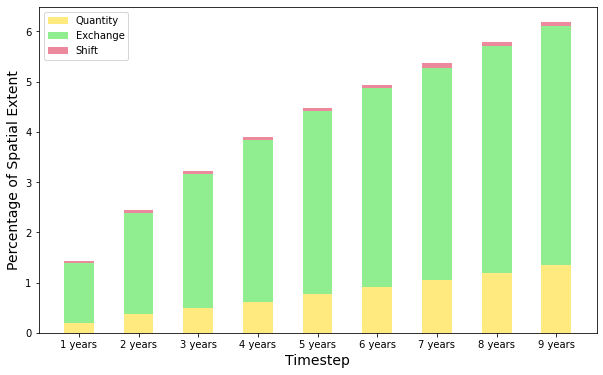

In [13]:

### PLOT components ####
fig, ax = plt.subplots(figsize=(10,6))

#labels=np.flip(change[count.argsort()])[0:10]
#xlabels=np.arange(2,20,2).astype(str)
xlabels=[]
for i in np.arange(gap,endyear-startyear+gap,gap):
    xlabels.append(str(i)+' years')

width=0.5
#bargheight=dfgain.iloc[:,1:].cumsum(axis=1)
#barlheight=dfloss.iloc[:,1:].cumsum(axis=1)

p=[]

#p.append(ax.bar(xlabels,percpers,width,color='teal',alpha=0.6))

p.append(ax.bar(xlabels,percquant,width,bottom=percpers,color='gold',alpha=0.5))

p.append(ax.bar(xlabels,percex,width,bottom=np.array(percpers)+np.array(percquant),color='lightgreen'))

p.append(ax.bar(xlabels,percshift,width,bottom=np.array(percpers)+np.array(percquant)+np.array(percex),color='crimson',alpha=0.5))


colors=['gold','brown','crimson']


ax.set_ylabel('Percentage of Spatial Extent',fontsize=14)
ax.set_xlabel('Timestep',fontsize=14)
#ax.set_title("Non Vegetated Area")
plt.legend((p[0][0], p[1][0],p[2][0]), ('Quantity','Exchange','Shift'))    

plt.show()